
OASIS INFOBYTE INTERNSHIP

Task 1 :  IRIS FLOWER CLASSIFICATION 

BY : DHANSHRI BALASAHEB BAJARE |
E-mail : bajaredhanashree@gmail.com

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

Although the Scikit-learn library provides a dataset for iris flower classification, you can also download the same dataset from here for the task of iris flower classification with Machine Learning.

In [40]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [41]:
df = pd.read_csv('D:/Oasis Infobyte/Iris (1).csv')

In [42]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [43]:
df.shape

(150, 6)

In [44]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [45]:
df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [46]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [47]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [48]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [49]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [50]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [51]:
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [52]:
df.value_counts()

Id   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species       
1    5.1            3.5           1.4            0.2           Iris-setosa       1
2    4.9            3.0           1.4            0.2           Iris-setosa       1
3    4.7            3.2           1.3            0.2           Iris-setosa       1
4    4.6            3.1           1.5            0.2           Iris-setosa       1
5    5.0            3.6           1.4            0.2           Iris-setosa       1
                                                                                ..
146  6.7            3.0           5.2            2.3           Iris-virginica    1
147  6.3            2.5           5.0            1.9           Iris-virginica    1
148  6.5            3.0           5.2            2.0           Iris-virginica    1
149  6.2            3.4           5.4            2.3           Iris-virginica    1
150  5.9            3.0           5.1            1.8           Iris-virginica    1
Name: cou

In [53]:
df.duplicated().sum()

np.int64(0)

In [54]:
df.drop_duplicates(inplace=True)

In [55]:
df.shape

(150, 6)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [57]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [58]:
df['Species'] = df['Species'].astype('category').cat.codes  # Converts species to numbers
df.corr()  # Now it will work!


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

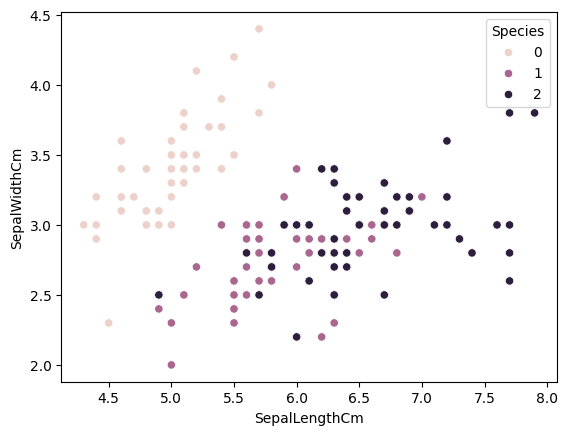

In [59]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df)


<Axes: >

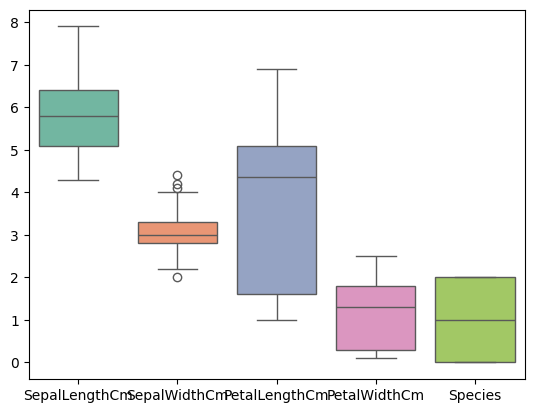

In [60]:
df = df.drop(['Id'], axis=1)
sns.boxplot(data=df, orient="v", palette="Set2")


In [61]:
# Encode the target variable (Species)
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

In [62]:
# Split data into features (X) and target (y)
X = df.drop(columns=['Species'])
y = df['Species']

In [63]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [64]:
# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
# Make predictions
y_pred = model.predict(X_test)

In [67]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

In [68]:
print(accuracy)

0.9


In [69]:
# Generate classification report dictionary
report_dict = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Display the DataFrame as a table
report_df

,precision,recall,f1-score,support
0,1.000000,1.0,1.000000,10.0
1,0.818182,0.9,0.857143,10.0
2,0.888889,0.8,0.842105,10.0
accuracy,0.900000,0.9,0.900000,0.9
macro avg,0.902357,0.9,0.899749,30.0
weighted avg,0.902357,0.9,0.899749,30.0
